In [154]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [155]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [156]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [157]:
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

**Список колонок в train,содержащих Null значения**

In [158]:
train.columns[train.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

**Заполняем пропуски в данных**

In [159]:

#Заполняю NaN в стобце средним значением
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)

#Из анализа зависимости этого столбца от столбца стоимости виден следующий вес каждого уникального значения
train['Alley'].fillna('nan',inplace=True)
size_mapping = {'Pave' : 3,
                'Grvl' : 2,
                'nan' : 1}
train['Alley'] = train['Alley'].map(size_mapping)

size_mapping = {'Reg' : 4,
                'IR1' : 3,
                'IR2' : 2,
                'IR3' : 1}
train['LotShape'] = train['LotShape'].map(size_mapping)

#Заменим пропуски на самое частовстречаемое значение,т.к. пропусков всего 1-150 из более 2000 строк
train['MasVnrType'].fillna('None', inplace = True)
train['MasVnrArea'].fillna(0, inplace = True)
train['BsmtQual'].fillna('TA', inplace = True)
train['BsmtCond'].fillna('TA',inplace = True)
train['BsmtExposure'].fillna('No', inplace = True)
train['BsmtFinType1'].fillna('Unf', inplace = True)
train['BsmtFinType2'].fillna('Unf', inplace = True)
train['Electrical'].fillna('SBrkr', inplace = True)
train['GarageType'].fillna('Attchd', inplace = True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
train['GarageFinish'].fillna('Unf', inplace = True)
train['GarageQual'].fillna('TA', inplace = True)
train['GarageCond'].fillna('TA', inplace = True)
train['Fence'].fillna('MnPrv', inplace = True)

#Заполним пробелы в тестовых данных
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace = True)

test['Alley'].fillna('nan',inplace=True)
size_mapping = {'Pave' : 3,
                'Grvl' : 2,
                'nan' : 1}
test['Alley'] = test['Alley'].map(size_mapping)

size_mapping = {'Reg' : 4,
                'IR1' : 3,
                'IR2' : 2,
                'IR3' : 1}
test['LotShape'] = test['LotShape'].map(size_mapping)


test['MasVnrType'].fillna('None', inplace = True)
test['MasVnrArea'].fillna(0, inplace = True)
test['BsmtQual'].fillna('TA', inplace = True)
test['BsmtCond'].fillna('TA',inplace = True)
test['BsmtExposure'].fillna('No', inplace = True)
test['BsmtFinType1'].fillna('Unf', inplace = True)
test['BsmtFinType2'].fillna('Unf', inplace = True)
test['Electrical'].fillna('SBrkr', inplace = True)
test['GarageType'].fillna('Attchd', inplace = True)
test['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
test['GarageFinish'].fillna('Unf', inplace = True)
test['GarageQual'].fillna('TA', inplace = True)
test['GarageCond'].fillna('TA', inplace = True)
test['Fence'].fillna('MnPrv', inplace = True)

test['MSZoning'].fillna('RL', inplace = True)
test['Utilities'].fillna('AllPub', inplace = True)
test['Exterior1st'].fillna('VinylSd', inplace = True)
test['Exterior2nd'].fillna('VinylSd', inplace = True)
test['BsmtFinSF1'].fillna(0, inplace = True)
test['BsmtFinSF2'].fillna(0, inplace = True)
test['BsmtUnfSF'].fillna(0, inplace = True)
test['TotalBsmtSF'].fillna(0, inplace = True)
test['BsmtFullBath'].fillna(0, inplace = True)
test['BsmtHalfBath'].fillna(0, inplace = True)
test['KitchenQual'].fillna('TA', inplace = True)
test['Functional'].fillna('Typ', inplace = True)
test['GarageCars'].fillna(2, inplace = True)
test['GarageArea'].fillna(0, inplace = True)
test['SaleType'].fillna('WD', inplace = True)

#Удалим столбцы с большим числом незаполненных данных или несущественными данными
cols_delete_arr = ['MiscFeature','FireplaceQu','PoolQC','Street','Utilities','LandSlope','Condition2',
                   'RoofMatl','Exterior1st','Exterior2nd','ExterCond','Foundation','BsmtCond',
                   'BsmtFinType1','Heating','CentralAir','Electrical','Functional','GarageType',
                   'GarageQual','GarageCond','PavedDrive','Fence','SaleType','BsmtFinType2']
train = train.drop(cols_delete_arr , axis = 1)
test = test.drop(cols_delete_arr , axis= 1)


**Преобразовываем категориальные признаки**

In [160]:
# MSZoning -> RL,Not_RL: так как RL доминирующая категория,занимающая 90% от признака
temp = train[['Id','MSZoning']]
new_msz = pd.DataFrame()

new_msz['Id'] = train['Id']
new_msz['RL'] = np.where(train['MSZoning'] == 'RL', 1, 0)
new_msz['Not_RL'] = np.where(train['MSZoning'] != 'RL',1,0)

train.drop(['MSZoning'],axis='columns', inplace=True)
train = pd.merge(left = train,right = new_msz,left_on = 'Id',right_on = 'Id')


temp = test[['Id','MSZoning']]
new_msz = pd.DataFrame()

new_msz['Id'] = test['Id']
new_msz['RL'] = np.where(test['MSZoning'] == 'RL', 1, 0)
new_msz['Not_RL'] = np.where(test['MSZoning'] != 'RL',1,0)

test.drop(['MSZoning'],axis='columns', inplace=True)
test = pd.merge(left = test,right = new_msz,left_on = 'Id',right_on = 'Id')


In [161]:
# LandContour -> Lvl,Not_Lvl: так как RL доминирующая категория,занимающая 90% от признака
temp = train[['Id','LandContour']]
new_msz = pd.DataFrame()

new_msz['Id'] = train['Id']
new_msz['Lvl'] = np.where(train['LandContour'] == 'Lvl', 1, 0)
new_msz['Not_Lvl'] = np.where(train['LandContour'] != 'Lvl',1,0)

train.drop(['LandContour'],axis='columns', inplace=True)
train = pd.merge(left = train,right = new_msz,left_on = 'Id',right_on = 'Id')


temp = test[['Id','LandContour']]
new_msz = pd.DataFrame()

new_msz['Id'] = test['Id']
new_msz['Lvl'] = np.where(test['LandContour'] == 'Lvl', 1, 0)
new_msz['Not_Lvl'] = np.where(test['LandContour'] != 'Lvl',1,0)

test.drop(['LandContour'],axis='columns', inplace=True)
test = pd.merge(left = test,right = new_msz,left_on = 'Id',right_on = 'Id')

# HeatingQC
temp = train[['Id','HeatingQC']]
new_msz = pd.DataFrame()

new_msz['Id'] = train['Id']
new_msz['Ex'] = np.where(train['HeatingQC'] == 'Ex', 1, 0)
new_msz['Gd'] = np.where(train['HeatingQC'] == 'Gd', 1, 0)
new_msz['TA'] = np.where(train['HeatingQC'] == 'TA', 1, 0)

train.drop(['HeatingQC'],axis='columns', inplace=True)
train = pd.merge(left = train,right = new_msz,left_on = 'Id',right_on = 'Id')


temp = test[['Id','HeatingQC']]
new_msz = pd.DataFrame()

new_msz['Id'] = test['Id']
new_msz['Ex'] = np.where(test['HeatingQC'] == 'Ex', 1, 0)
new_msz['Gd'] = np.where(test['HeatingQC'] == 'Gd', 1, 0)
new_msz['TA'] = np.where(test['HeatingQC'] == 'TA', 1, 0)

test.drop(['HeatingQC'],axis='columns', inplace=True)
test = pd.merge(left = test,right = new_msz,left_on = 'Id',right_on = 'Id')


# SaleCondition
temp = train[['Id','SaleCondition']]
new_msz = pd.DataFrame()

new_msz['Id'] = train['Id']
new_msz['NormCond'] = np.where(train['SaleCondition'] == 'Normal', 1, 0)
new_msz['NotNormCond'] = np.where(train['SaleCondition'] != 'Normal',1,0)

train.drop(['SaleCondition'],axis='columns', inplace=True)
train = pd.merge(left = train,right = new_msz,left_on = 'Id',right_on = 'Id')


temp = test[['Id','SaleCondition']]
new_msz = pd.DataFrame()

new_msz['Id'] = test['Id']
new_msz['NormCond'] = np.where(test['SaleCondition'] == 'Normal', 1, 0)
new_msz['NotNormCond'] = np.where(test['SaleCondition'] != 'Normal',1,0)

test.drop(['SaleCondition'],axis='columns', inplace=True)
test = pd.merge(left = test,right = new_msz,left_on = 'Id',right_on = 'Id')


In [162]:
# LotConfig
temp = pd.get_dummies(train[['Id','LotConfig']])
train.drop(['LotConfig'],axis='columns', inplace=True)
train = pd.merge(left = train, right = temp, left_on='Id', right_on='Id')

temp = pd.get_dummies(test[['Id','LotConfig']])
test.drop(['LotConfig'],axis='columns', inplace=True)
test = pd.merge(left = test, right = temp, left_on='Id', right_on='Id')

# Neighborhood
temp = pd.get_dummies(train[['Id','Neighborhood']])
train.drop(['Neighborhood'],axis='columns', inplace=True)
train = pd.merge(left = train, right = temp, left_on='Id', right_on='Id')

temp = pd.get_dummies(test[['Id','Neighborhood']])
test.drop(['Neighborhood'],axis='columns', inplace=True)
test = pd.merge(left = test, right = temp, left_on='Id', right_on='Id')

# Condition1
temp = pd.get_dummies(train[['Id','Condition1']])
train.drop(['Condition1'],axis='columns', inplace=True)
train = pd.merge(left = train, right = temp, left_on='Id', right_on='Id')

temp = pd.get_dummies(test[['Id','Condition1']])
test.drop(['Condition1'],axis='columns', inplace=True)
test = pd.merge(left = test, right = temp, left_on='Id', right_on='Id')

# BldgType
temp = pd.get_dummies(train[['Id','BldgType']])
train.drop(['BldgType'],axis='columns', inplace=True)
train = pd.merge(left = train, right = temp, left_on='Id', right_on='Id')

temp = pd.get_dummies(test[['Id','BldgType']])
test.drop(['BldgType'],axis='columns', inplace=True)
test = pd.merge(left = test, right = temp, left_on='Id', right_on='Id')

# HouseStyle
temp = pd.get_dummies(train[['Id','HouseStyle']])
temp.drop(['HouseStyle_2.5Fin'],axis='columns', inplace=True)
train.drop(['HouseStyle'],axis='columns', inplace=True)
train = pd.merge(left = train, right = temp, left_on='Id', right_on='Id')

temp = pd.get_dummies(test[['Id','HouseStyle']])
test.drop(['HouseStyle'],axis='columns', inplace=True)
test = pd.merge(left = test, right = temp, left_on='Id', right_on='Id')

# RoofStyle
temp = pd.get_dummies(train[['Id','RoofStyle']])
train.drop(['RoofStyle'],axis='columns', inplace=True)
train = pd.merge(left = train, right = temp, left_on='Id', right_on='Id')

temp = pd.get_dummies(test[['Id','RoofStyle']])
test.drop(['RoofStyle'],axis='columns', inplace=True)
test = pd.merge(left = test, right = temp, left_on='Id', right_on='Id')

# MasVnrType
temp = pd.get_dummies(train[['Id','MasVnrType']])
train.drop(['MasVnrType'],axis='columns', inplace=True)
train = pd.merge(left = train, right = temp, left_on='Id', right_on='Id')

temp = pd.get_dummies(test[['Id','MasVnrType']])
test.drop(['MasVnrType'],axis='columns', inplace=True)
test = pd.merge(left = test, right = temp, left_on='Id', right_on='Id')

# ExterQual
temp = pd.get_dummies(train[['Id','ExterQual']])
train.drop(['ExterQual'],axis='columns', inplace=True)
train = pd.merge(left = train, right = temp, left_on='Id', right_on='Id')

temp = pd.get_dummies(test[['Id','ExterQual']])
test.drop(['ExterQual'],axis='columns', inplace=True)
test = pd.merge(left = test, right = temp, left_on='Id', right_on='Id')

# BsmtExposure
temp = pd.get_dummies(train[['Id','BsmtExposure']])
train.drop(['BsmtExposure'],axis='columns', inplace=True)
train = pd.merge(left = train, right = temp, left_on='Id', right_on='Id')

temp = pd.get_dummies(test[['Id','BsmtExposure']])
test.drop(['BsmtExposure'],axis='columns', inplace=True)
test = pd.merge(left = test, right = temp, left_on='Id', right_on='Id')

# KitchenQual
temp = pd.get_dummies(train[['Id','KitchenQual']])
train.drop(['KitchenQual'],axis='columns', inplace=True)
train = pd.merge(left = train, right = temp, left_on='Id', right_on='Id')

temp = pd.get_dummies(test[['Id','KitchenQual']])
test.drop(['KitchenQual'],axis='columns', inplace=True)
test = pd.merge(left = test, right = temp, left_on='Id', right_on='Id')

# GarageFinish
temp = pd.get_dummies(train[['Id','GarageFinish']])
train.drop(['GarageFinish'],axis='columns', inplace=True)
train = pd.merge(left = train, right = temp, left_on='Id', right_on='Id')

temp = pd.get_dummies(test[['Id','GarageFinish']])
test.drop(['GarageFinish'],axis='columns', inplace=True)
test = pd.merge(left = test, right = temp, left_on='Id', right_on='Id')

# BsmtQual
temp = pd.get_dummies(train[['Id','BsmtQual']])
train.drop(['BsmtQual'],axis='columns', inplace=True)
train = pd.merge(left = train, right = temp, left_on='Id', right_on='Id')

temp = pd.get_dummies(test[['Id','BsmtQual']])
test.drop(['BsmtQual'],axis='columns', inplace=True)
test = pd.merge(left = test, right = temp, left_on='Id', right_on='Id')


**Разделяем выборку**

In [163]:
from sklearn.model_selection import train_test_split
X = train.drop('SalePrice',axis = 1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

'''X_train = X
y_train = y
X_test = test
y_test = pd.DataFrame(index = [range(1461,2919)],columns = ['SalePrice'])'''

"X_train = X\ny_train = y\nX_test = test\ny_test = pd.DataFrame(index = [range(1461,2919)],columns = ['SalePrice'])"

**Стандартизируем данные**

In [164]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

predict_data_scaled = ss.fit_transform(test)

**Строим модель случайных лесов для отбора признаков**

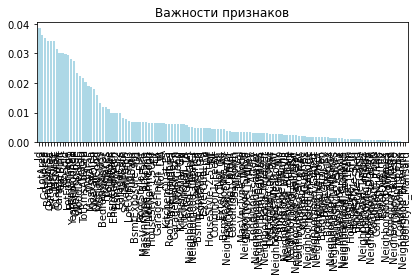

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

feat_labels = train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title('Важности признаков')
plt.bar(range(X_train_scaled.shape[1]), importances[indices], color = 'lightblue', align = 'center')
plt.xticks(range(X_train_scaled.shape[1]), feat_labels[indices], rotation = 90)
plt.xlim([-1,X_train_scaled.shape[1]])
plt.tight_layout()
plt.show()


In [166]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train_scaled,y_train)
regr.score(X_test_scaled,y_test)

0.7652315795349968

In [204]:
predicts = regr.predict(predict_data_scaled)

df = pd.DataFrame()
df['Id'] = range(1461,2920)
df['SalePrice'] = predicts
df.to_csv('predictions.csv',index = False)